# 聚類和分類的差別

## 聚類：
- 定義：探索每個組是否有關係
- 學習類型：無監督（無需進行標籤的訓練）
- 算法：Kmeans
- 特性：
    1. 結果是不確定的
    2. 不一定能反映數據的真實分類，會受到需求產生好結果或壞結果

## 分類：
- 定義：從已分組的數據去學習，將結果放到分好的組中
- 學習類型：監督式（需要進行標籤的訓練）
- 算法：Decision Tree、Logistic Regression、貝葉斯
- 特性：
    1. 結果是確定的
    2. 分類的結果是客觀的

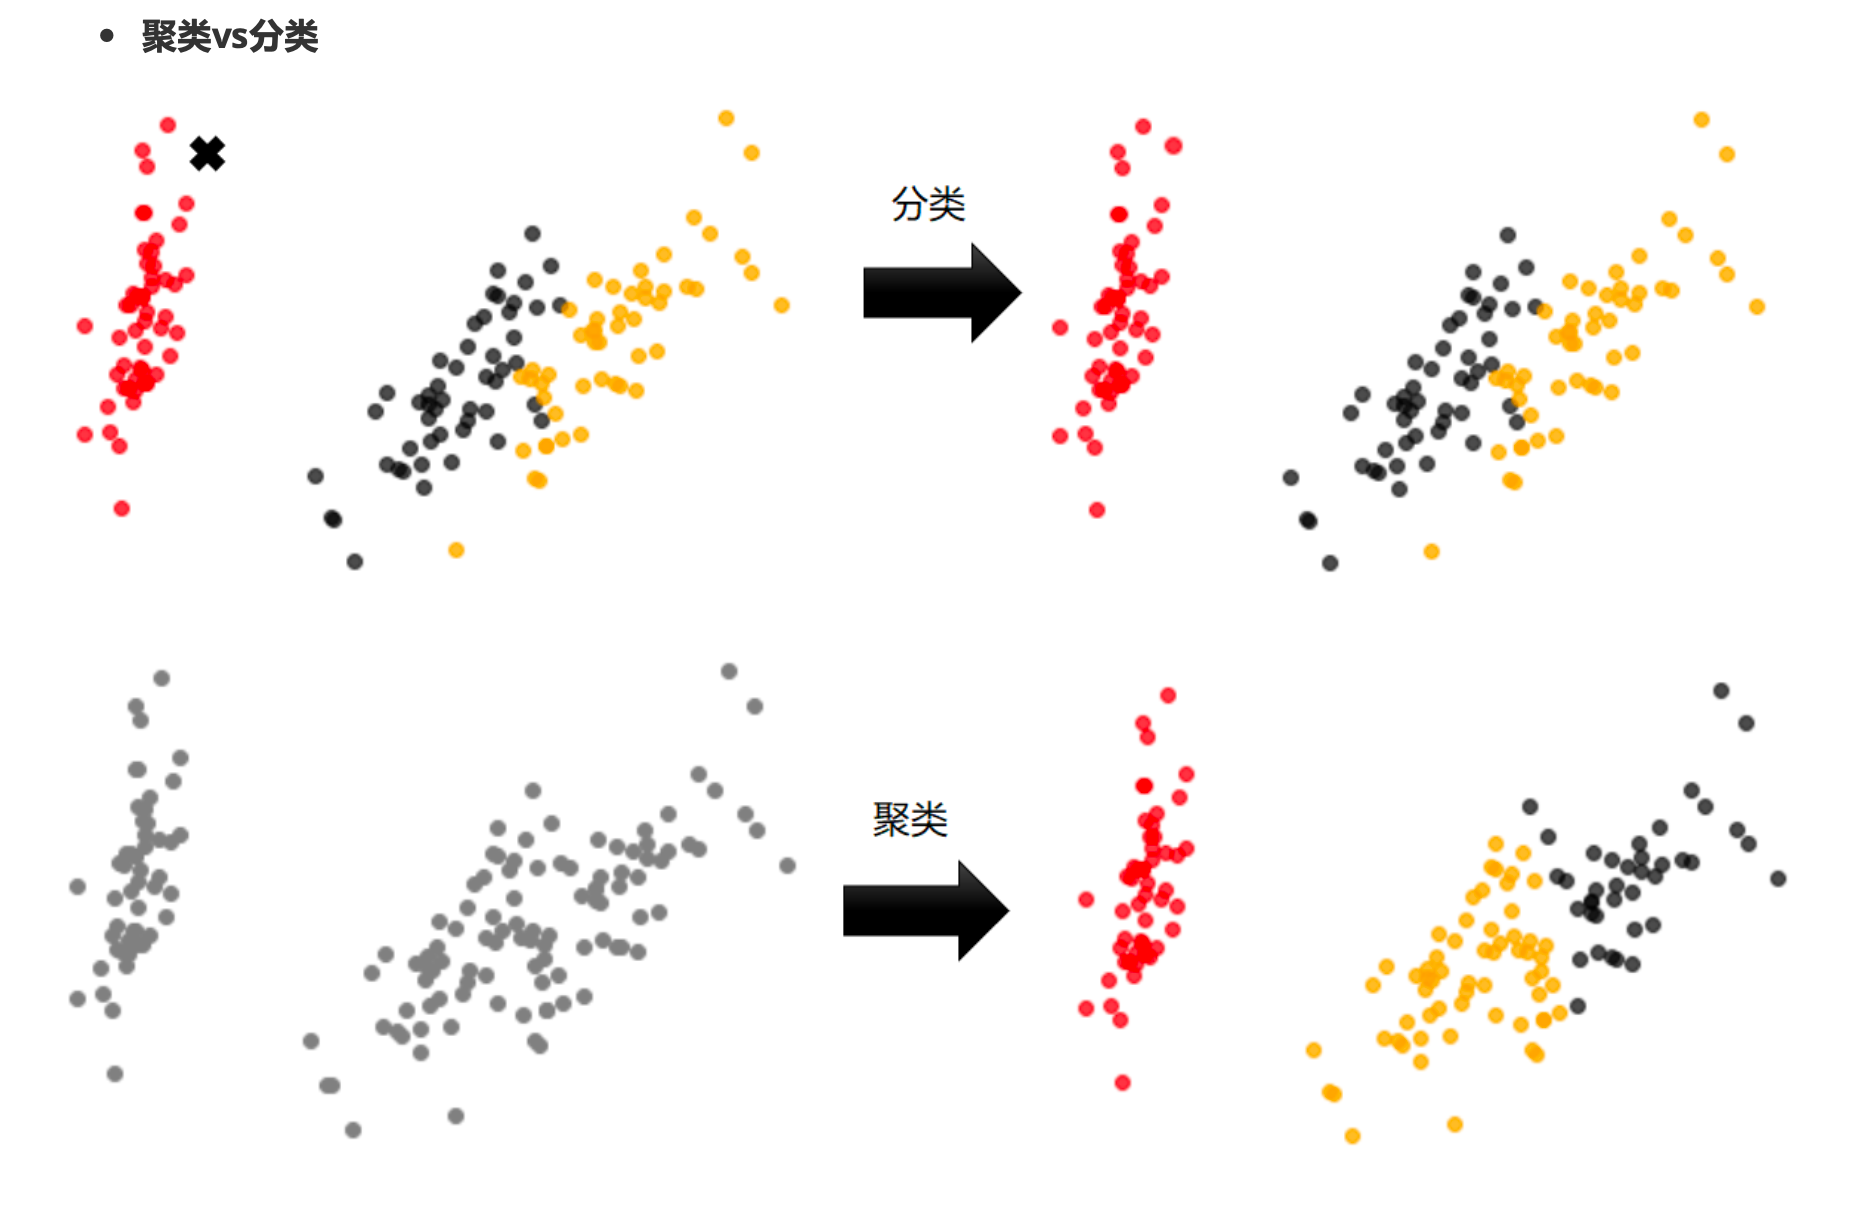

# KMeans 算法


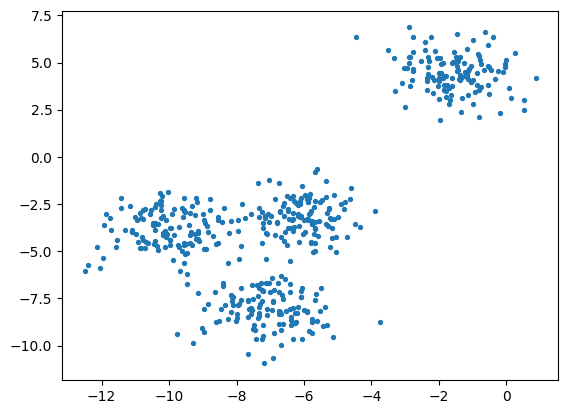

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_clusters = 3

X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0], X[:, 1]    #.scatter點圖
            ,marker='o'         #點的形狀
            ,s=8                #點的大小
           )
plt.show()

In [4]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3,random_state=0).fit(X)

y_pred = cluster.labels_
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

In [5]:
# Why fit_predict ?
# 可用於預測更大量基數的數據，以便減少時間的浪費。
# 利用少部分數據確定質心，再去預測龐大的數據
# 伴隨的就是預測結果會有出入
 
cluster_smallsub = KMeans(n_clusters=3, random_state=0).fit(X[:250])

y_pred_ = cluster_smallsub.predict(X)

y_pred_


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [6]:
y_pred == y_pred_

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False,

In [7]:
# Labels_ : 用於查看聚好的類別，每個樣本所對應的類
y_pred = cluster.labels_
#cLuster_centers_ : 質心
centroid = cluster.cluster_centers_
#inertia_ : 總距離平方和
inertia = cluster.inertia_

inertia

1903.5607664611762

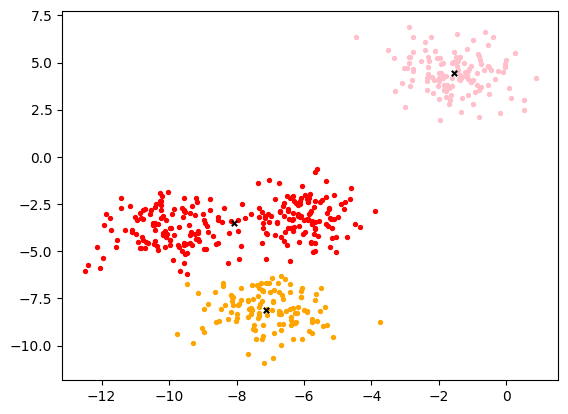

In [8]:
color = ["red","pink","orange","gray"]

fig, ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
            ,marker='o' 
            ,s=8 
            ,c=color[i]
           )
    
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black")
plt.show()

In [9]:
# n_clusters 的討論
# inertia 會隨著 n_clusters 一起變小
# 因此在用 inertia 判斷模型效果好壞，要先確認 n_clusters 是固定的

n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


908.3855684760615

In [10]:
n_clusters = 5
cluster_5 = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_5.inertia_
inertia_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


811.0841324482415

# 如何衡量聚類的結果好壞？

以 KMeans 的目標“簇內差距要小，簇外差距要大”為基礎，因此透過衡量簇內差異來衡量好壞。

## 是否能用 Inertia 作為衡量指標？

可以，但不好，因為 Inertia 會受到 n_clusters 影響，若 n_clusters 越大 Inertia 勢必越小。

### 當標籤已知時

- 互信息分 :
    - metrics.adjusted_mutual_info_score (y_pred, y_true)
    - metrics.mutual_info_score (y_pred, y_true)
    - metrics.normalized_mutual_info_score (y_pred, y_true)
- V-measure :
    - metrics.homogeneity_score(y_true, y_pred)
    - metrics.v_measure_score(labels_true, labels_pred)
    - metrics.completeness_score(y_true, y_pred)
- 蘭德係數 :
    - metrics.adjusted_rand_score(y_true, y_pred)

### 當標籤不是已知時

- 輪廓係數 : 
    - 評價 ”簇內稠密程度“ 和 ”簇間離散程度“ 來評估聚類好壞的指標
    - Score 越高越好


In [11]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

silhouette_score(X,y_pred)      # cluster = 3


0.5882004012129721

In [12]:
silhouette_score(X,cluster_.labels_)    # cluster = 4

0.6505186632729437

In [13]:
silhouette_score(X,cluster_5.labels_)    # cluster = 5

0.5746932321727457

# 如何透過輪廓係數找到最佳 n_cluster 參數？

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


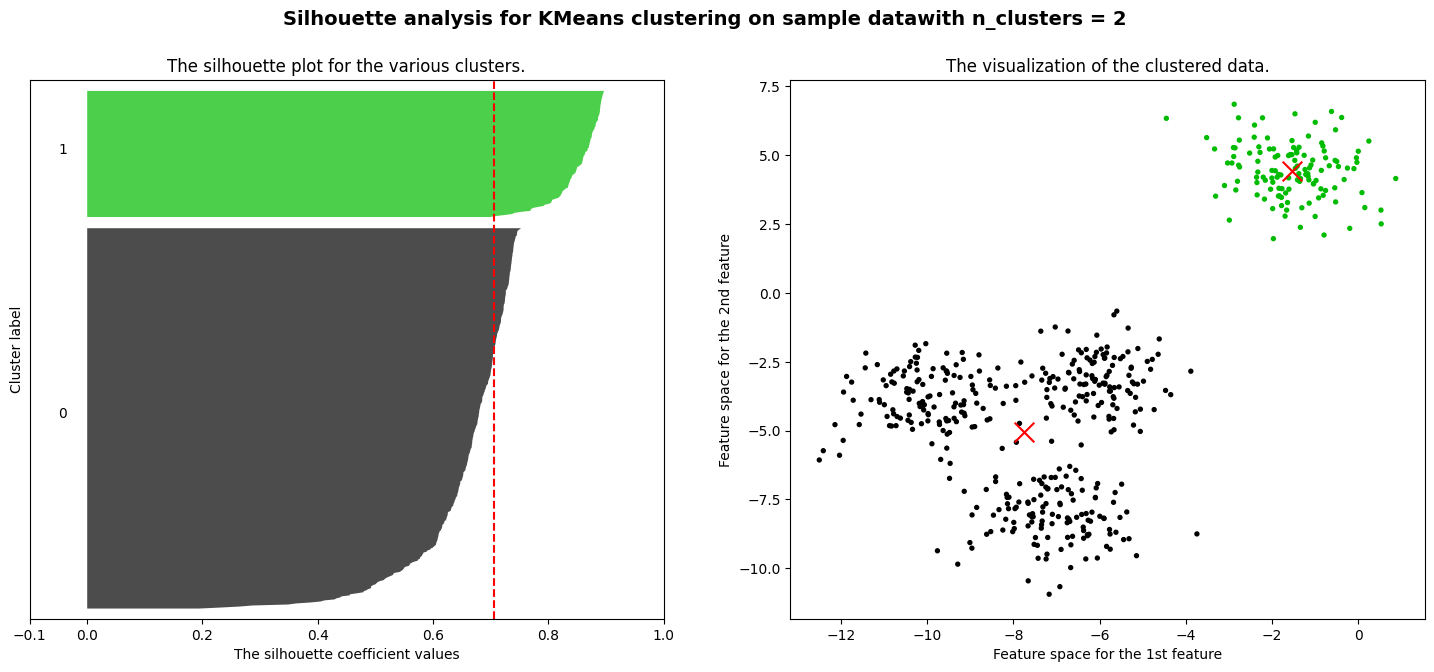

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


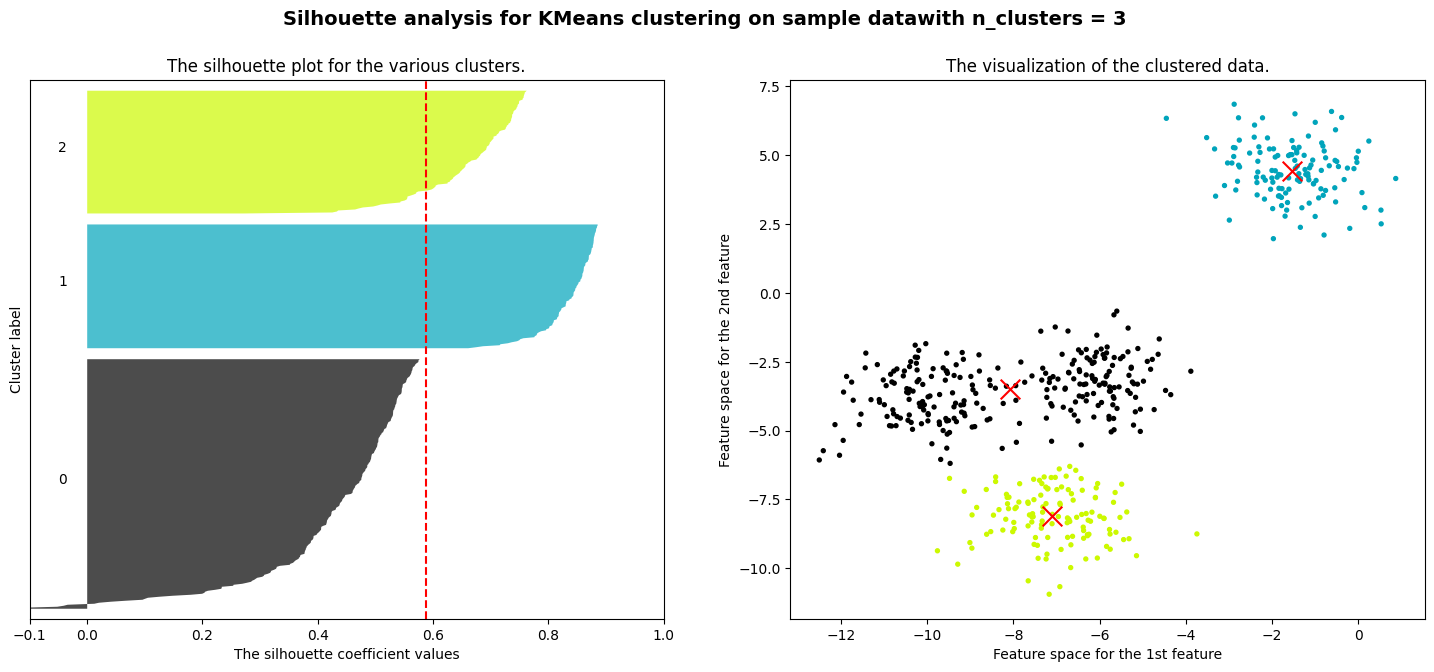

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


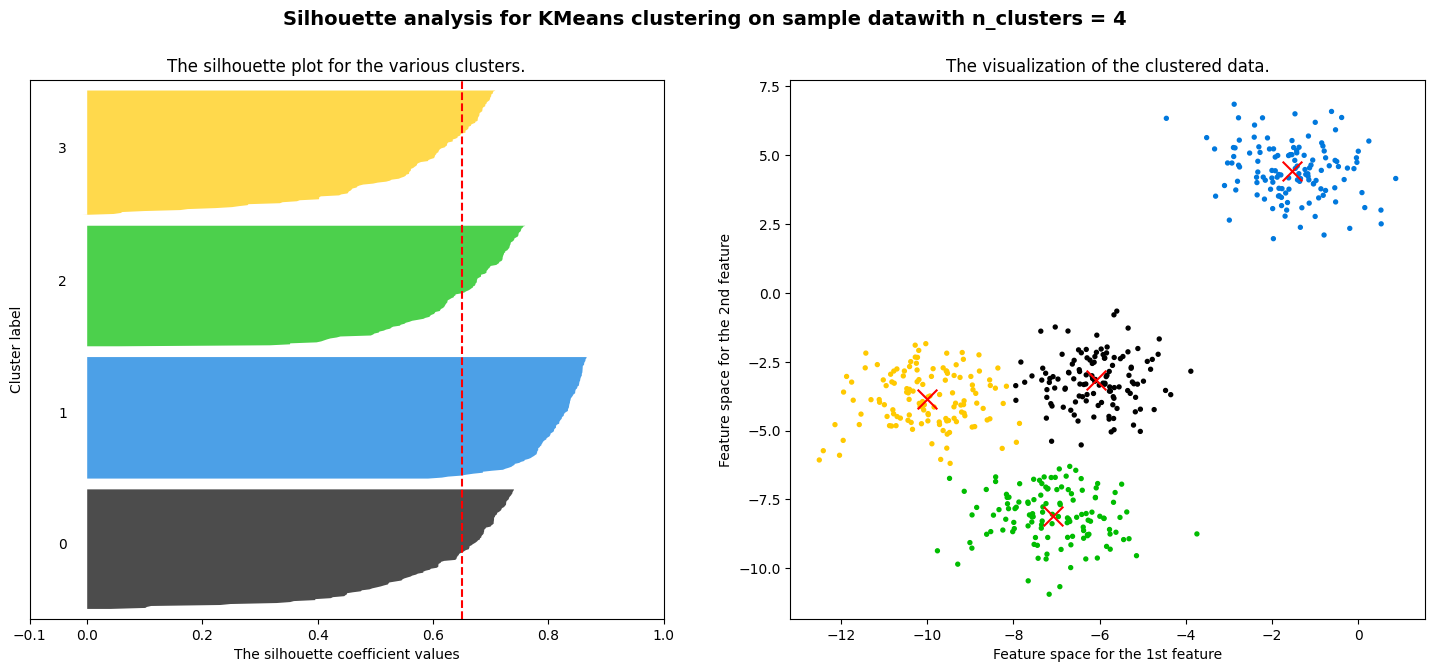

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


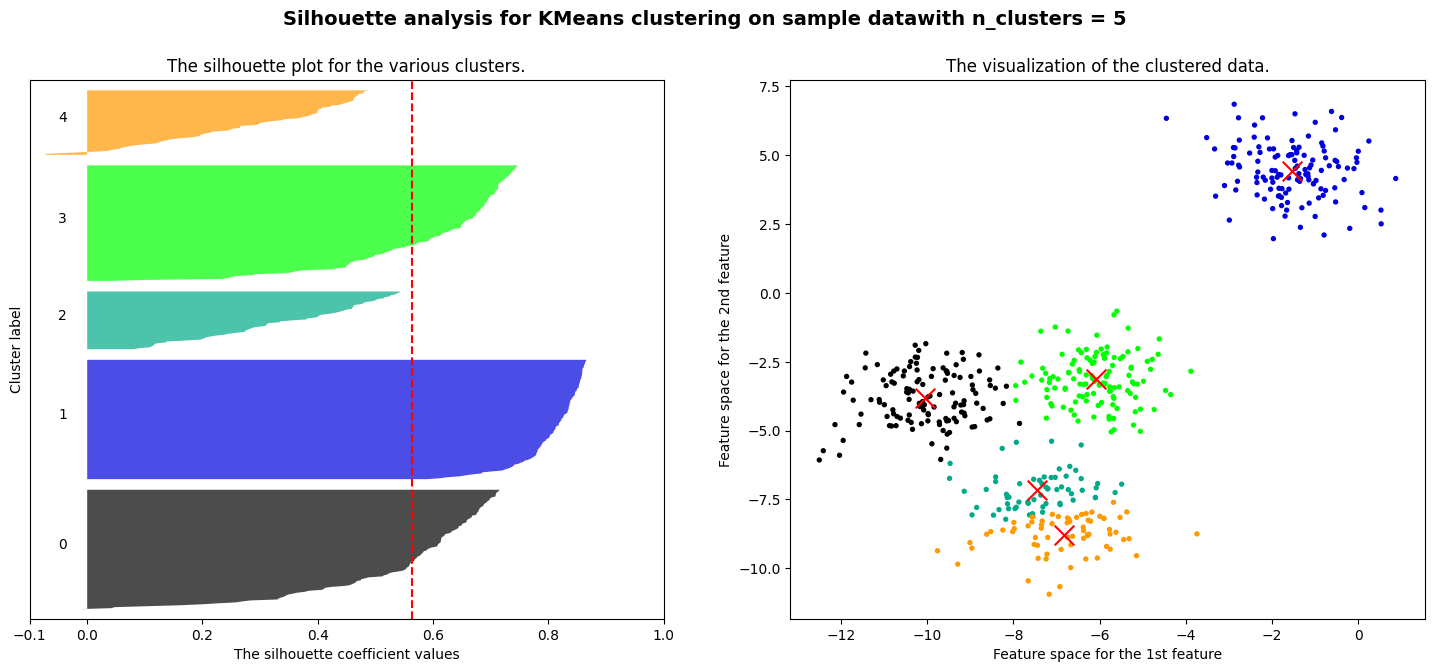

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


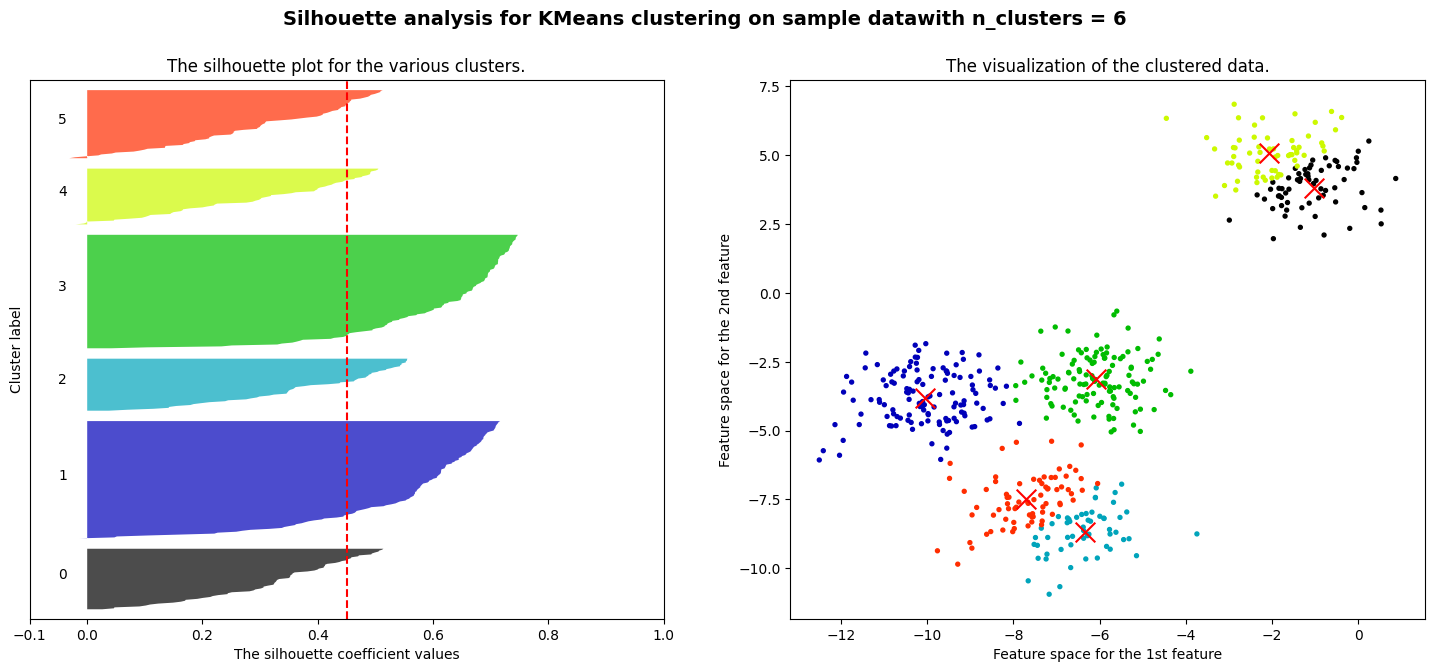

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


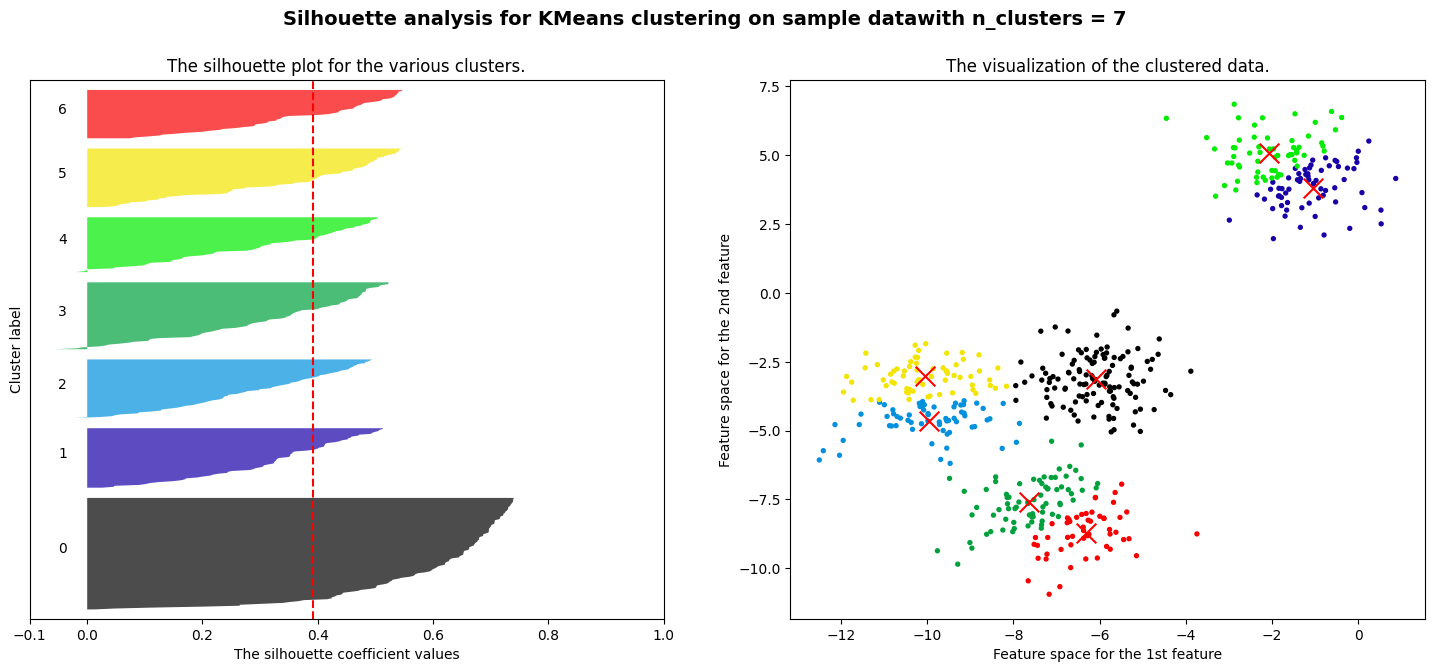

In [16]:
'''
目標：

1. 知道每個聚出來的類輪廓係數為多少？
2. 畫出聚類完畢之後的分布模樣

'''

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    # 畫布共有 row: 1 , col: 2 個子圖
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # 畫布尺寸
    fig.set_size_inches(18,7)
    # x座標的範圍
    ax1.set_xlim([-0.1, 1])
    # y座標，其中 (n_clusters + 1) * 10 為了給予間隔，避免全部連在一起，方便可視化
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    #建模
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    #計算整體輪廓係數
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
    #個別樣本點的輪廓係數
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # y_lower 可避免第一筆資料貼著x軸開始
    y_lower = 10

    for i in range(n_clusters):
        #取出第i個簇的輪廓係數，並排列（方便可視化）
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        #size_cluster_i 樣本數
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        #確保每個簇顏色都不同
        color = cm.nipy_spectral(float(i)/n_clusters)
        
        #開始畫子圖1
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                        ,ith_cluster_silhouette_values
                        ,facecolor=color
                        ,alpha=0.7
                        )

        ax1.text(-0.05 #x座標
                , y_lower + 0.5 * size_cluster_i #y座標
                , str(i)) #輸出的值

        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    #紅色虛線代表整體的平均輪廓係數
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    # y軸不顯示刻度
    ax1.set_yticks([])
    # x軸刻度間隔
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #開始畫子圖2
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
            )
    # 畫出 cluster 質心
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    plt.show()

# 降維應用：KMeans做矢量量化

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [18]:
china = load_sample_image("china.jpg")

In [20]:
china.shape
# 長＊寬＊像素

(427, 640, 3)

In [22]:
newimage = china.reshape((427 * 640,3))
newimage.shape

(273280, 3)

In [23]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape
#扣除重複的，共有96615種顏色

(96615, 3)

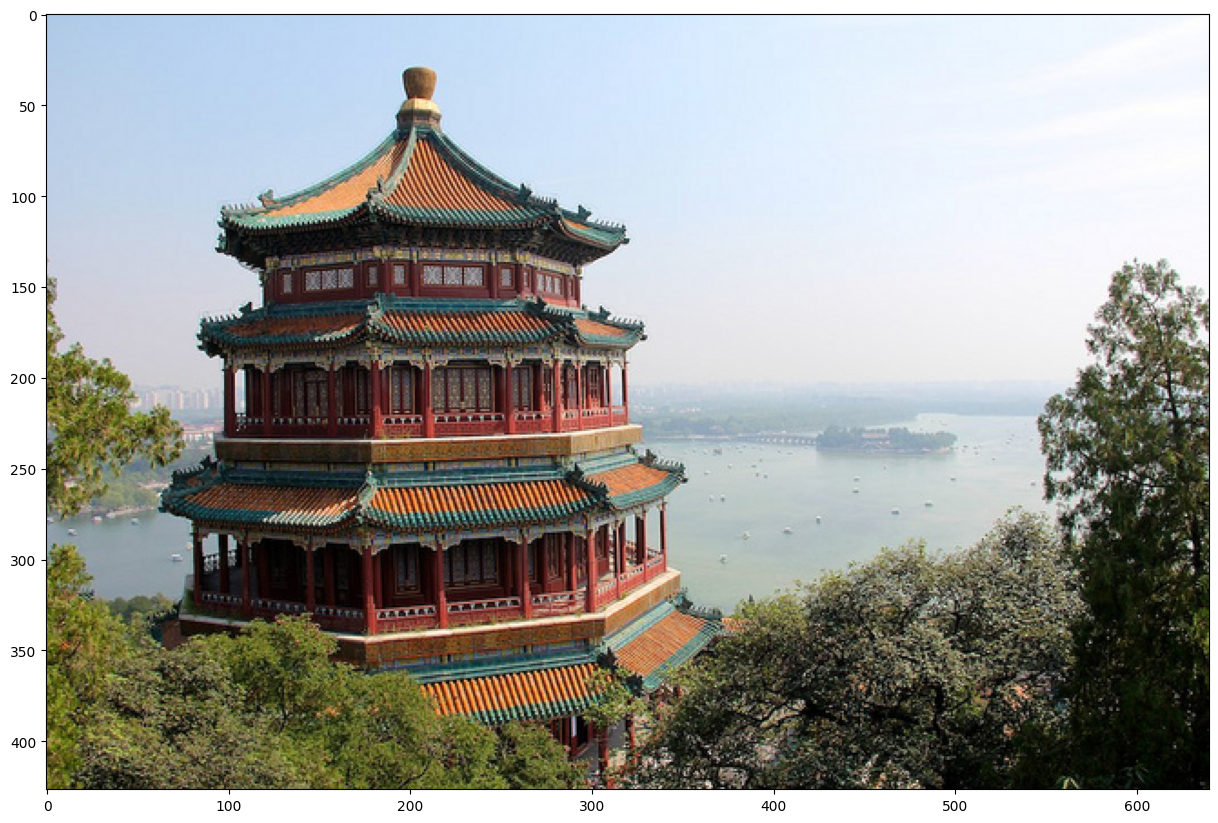

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(china)

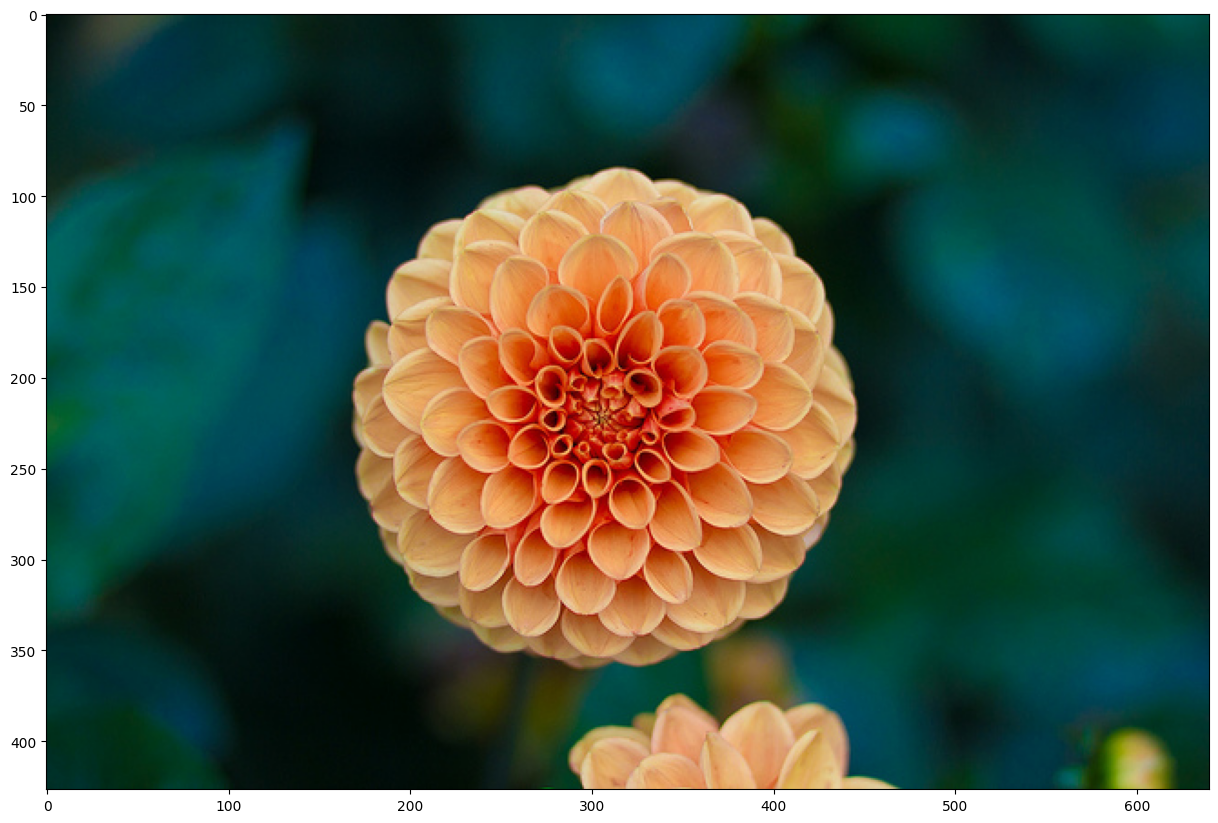

In [25]:
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

In [26]:
# KMeans 不接受三維數組做為特徵矩陣 => 要將圖片降維
n_clusters = 64
#plt.imshow 在浮點數表現優秀 => 做歸一化將數據壓縮到 [0,1]
china = np.array(china, dtype=np.float64) / china.max()
#將圖片格式轉為矩陣格式
w, h, d = original_shape = tuple(china.shape)
#assert d == 3 代表若d不為3則python中斷執行
assert d == 3
image_array = np.reshape(china, (w * h, d))
image_array.shape

(273280, 3)

# KMeans的矢量量化

In [30]:
#使用隨機1000個數據找出64個質心
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_.shape

#之後再對所有數據進行聚類
labels = kmeans.predict(image_array)
labels.shape

#用質心替換所有數據 (Key Point)
#kmeans.cluster_centers_ : 質心的位置
#labels : 預測後對應的質心編號
image_kmeans = image_array.copy()
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

image_kmeans
pd.DataFrame(image_kmeans).drop_duplicates().shape

#恢復圖片結構
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(427, 640, 3)

In [35]:
kmeans.cluster_centers_

array([[0.62570806, 0.60261438, 0.53028322],
       [0.15546218, 0.1557423 , 0.12829132],
       [0.82063983, 0.89896801, 0.98462332],
       [0.42039216, 0.43843137, 0.2227451 ],
       [0.69527105, 0.74994233, 0.76516724],
       [0.92174422, 0.9556336 , 0.99514194],
       [0.07058824, 0.0754637 , 0.0508744 ],
       [0.28205128, 0.26395173, 0.19638009],
       [0.46509804, 0.43372549, 0.36901961],
       [0.71328976, 0.41960784, 0.31851852],
       [0.83529412, 0.86349206, 0.89505135],
       [0.76068627, 0.85617647, 0.9604902 ],
       [0.36372549, 0.36830065, 0.31405229],
       [0.34509804, 0.1654902 , 0.12901961],
       [0.53448674, 0.53264129, 0.50657439],
       [0.15098039, 0.24444444, 0.25228758],
       [0.56764706, 0.61993464, 0.6369281 ],
       [0.89411765, 0.63764706, 0.43529412],
       [0.58823529, 0.5630719 , 0.40588235],
       [0.60392157, 0.30326797, 0.25882353],
       [0.50784314, 0.31568627, 0.17908497],
       [0.0310856 , 0.0288857 , 0.01759923],
       [0.

# 隨機的矢量量化

In [31]:
#使用隨機找出64個質心
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random.shape

#用質心替換所有數據 (Key Point)
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

#恢復圖片結構
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

# 比較原圖、KMeans、Random 的差異

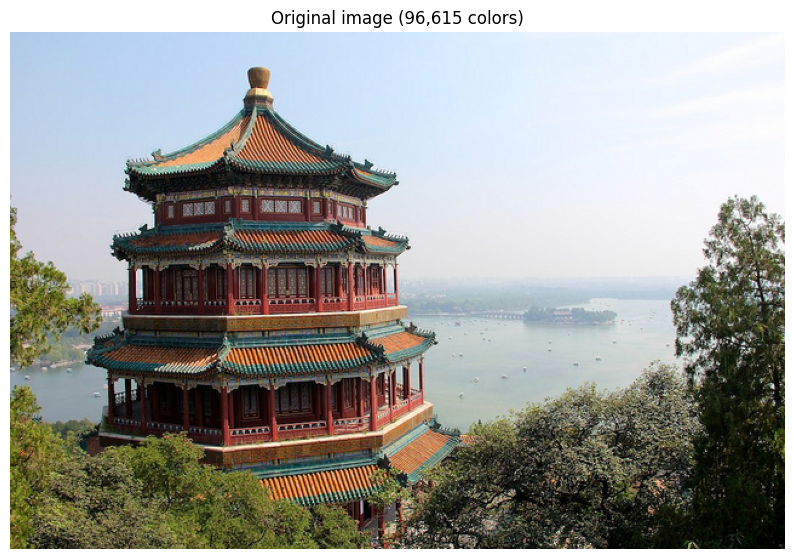

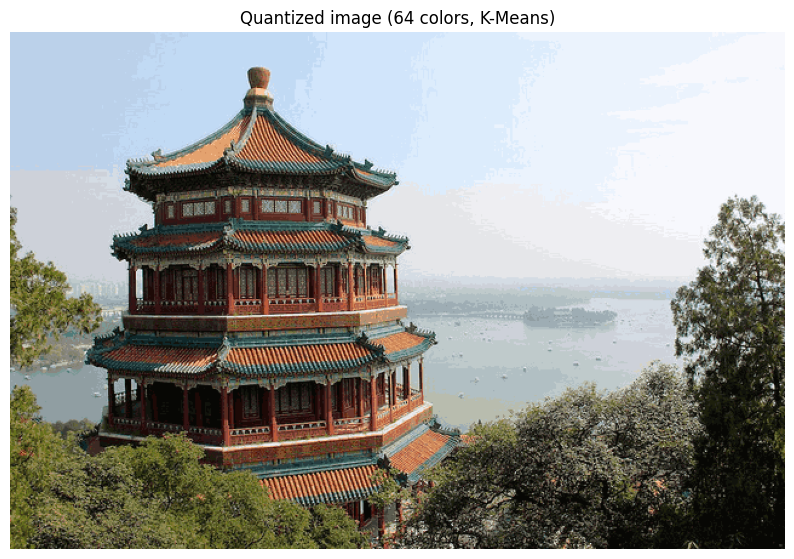

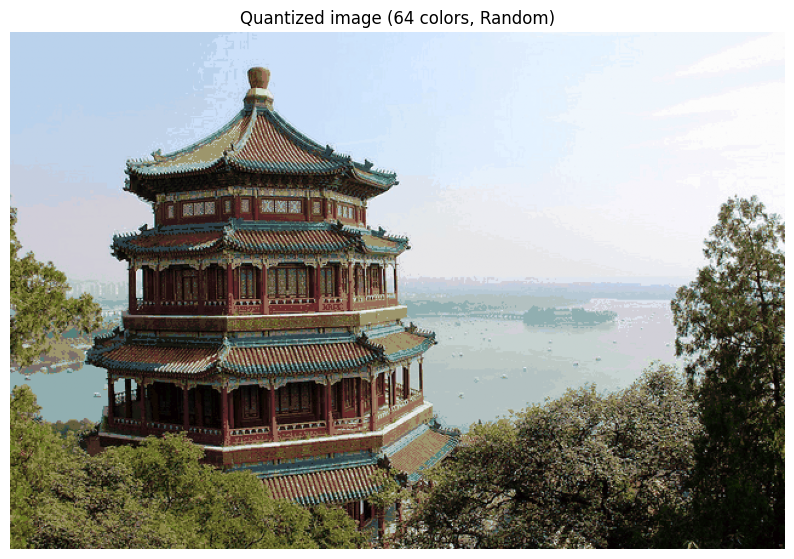

In [32]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()